In [1]:

from sys import path
import grid_set as gs
import itertools
import numpy as np
from scipy import stats
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import datetime as dt
from dateutil.relativedelta import relativedelta
import copy
from imp import reload
reload(gs)

<module 'grid_set' from '/Users/h/Github/CMIP6_data/grid_set.py'>

In [2]:
# m = ccrs.NorthPolarStereo()
## NSIDC grid
m = ccrs.NorthPolarStereo(central_longitude=-45)

In [3]:
G = gs.grid_set(m)
G.load_grid('./NSIDC_gs.npz')
# G.load_mask('./Ease_reduced_for Eco_mask.npz')
G.get_grid_mask()

Loaded a grid: ./NSIDC_gs.npz


/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """Entry point for launching an IPython kernel.


['AS-RCEC--TaiESM1_ensembles_used',
 'BCC--BCC-CSM2-MR_ensembles_used',
 'CAMS--CAMS-CSM1-0_ensembles_used',
 'CAS--FGOALS-f3-L_ensembles_used',
 'CAS--FGOALS-g3_ensembles_used',
 'CCCma--CanESM5-CanOE_ensembles_used',
 'CCCma--CanESM5_ensembles_used',
 'CNRM-CERFACS--CNRM-CM6-1-HR_ensembles_used',
 'CNRM-CERFACS--CNRM-CM6-1_ensembles_used',
 'CNRM-CERFACS--CNRM-ESM2-1_ensembles_used',
 'CSIRO--ACCESS-ESM1-5_ensembles_used',
 'CSIRO-ARCCSS--ACCESS-CM2_ensembles_used',
 'DKRZ--MPI-ESM1-2-HR_ensembles_used',
 'EC-Earth-Consortium--EC-Earth3-CC_ensembles_used',
 'EC-Earth-Consortium--EC-Earth3-Veg-LR_ensembles_used',
 'EC-Earth-Consortium--EC-Earth3-Veg_ensembles_used',
 'EC-Earth-Consortium--EC-Earth3_ensembles_used',
 'FIO-QLNM--FIO-ESM-2-0_ensembles_used',
 'IPSL--IPSL-CM6A-LR_ensembles_used',
 'MIROC--MIROC-ES2L_ensembles_used',
 'MIROC--MIROC6_ensembles_used',
 'MOHC--HadGEM3-GC31-LL_ensembles_used',
 'MOHC--UKESM1-0-LL_ensembles_used',
 'MPI-M--MPI-ESM1-2-LR_ensembles_used',
 'MRI--

In [4]:
data_IC = {}
# f_nc = Dataset('/Users/h/ECOLIGHT/IC_animation/First_IC_ensemble_save_ssp245.nc')
# f_nc = Dataset('/Users/h/ECOLIGHT/IC_animation/IC_ensemble_submean_save_+ssp245.nc')
f_nc = Dataset('/Users/h/ECOLIGHT/IC_animation/IC_ensemble_submean_save_ssp585.nc')
for key in f_nc.variables:
    print(key)
    data_IC[key] = f_nc.variables[key][:]
data_IC['Model_list'] = [d for d in dir(f_nc) if 'ensembles_used' in d]
for md in data_IC['Model_list']:
    data_IC[md] = f_nc.getncattr(md)
f_nc.close()

ice_area_ensemble
ice_extent_ensemble
lon
lat
time


/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  
/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  # Remove the CWD from sys.path while we load stuff.


In [5]:
d0 = dt.datetime(2000,1,1)
data_IC['dtime'] = [d0 + relativedelta(days = d*1.) for d in data_IC['time']]

In [10]:
dnow = data_IC['dtime'][-50]
ICnow = data_IC['ice_area_ensemble'][-50]
# ICnow = data_IC['ice_extent_ensemble'][0]
nmodels = len(data_IC['Model_list'])

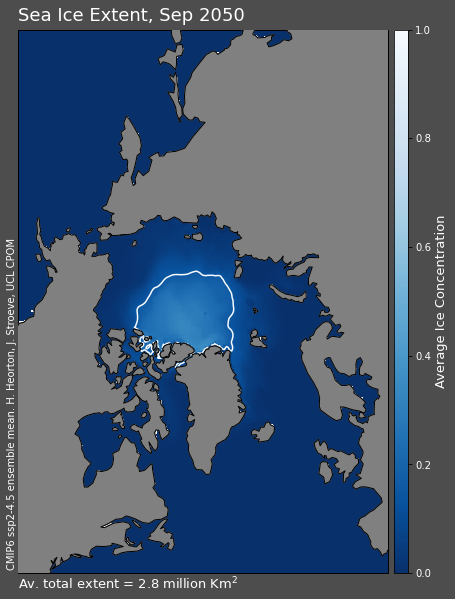

In [11]:
f = plt.figure(figsize=(12, 10))
# f.patch.set_facecolor('gray')
f.patch.set_facecolor([0.3,0.3,0.3])
ax = f.add_subplot(1,1,1,projection=m)
ax.set_extent(G.limits,m)

### set up plotting
plot_temp = ICnow
# plot_temp = ICnow>0.15

plot_temp_A = ICnow>0.15
area = np.sum(plot_temp_A*G.area)*1e-12

s = ax.pcolormesh(G.xptp,G.yptp,plot_temp,zorder=2,vmin=0.0,vmax=1.0,cmap='Blues_r')
# ax.plot(gs.border(G.xpts),gs.border(G.ypts))
if area>0.5:
    ax.contour(G.xpts,G.ypts,plot_temp,[0.15],cmap='Blues')

# ax.plot(Big.xpts,Big.ypts)
# s = ax.pcolormesh(GP.xpts,GP.ypts,PW.get_vels(PW.dates[10:12])[1][0])
ax.add_feature(cfeature.COASTLINE,zorder=4)
ax.add_feature(cfeature.LAND,facecolor = 'gray',zorder=3)
ax.text(G.limits[0],G.limits[3]*1.03,'Sea Ice Extent, '+dnow.strftime('%b %Y'),
        fontsize = 18,color='w')
ax.text(G.limits[0]*1.06,G.limits[2]*0.98,'CMIP6 ssp2-4.5 ensemble mean. H. Heorton, J. Stroeve, UCL CPOM',
        fontsize = 10,color='w',rotation = 90)
ax.text(G.limits[0]*1.0,G.limits[2]*1.06,'Av. total extent = '+'{:.2}'.format(area)+' million Km$^{2}$',
        fontsize = 13,color='w')

cax = plt.colorbar(s,shrink = 1.,pad=0.01,aspect=40)
# cax.set_ticks([0.1,0.8],color='w')
ticks=np.arange(0.0,1.2,0.2)
tlab = ['{:.2}'.format(t) for t in ticks]
# tlab = [int(t*nmodels) for t in ticks]
cax.ax.yaxis.set_ticks(ticks)
cax.ax.yaxis.set_ticklabels(tlab,color='w')
# cax.set_label('No. models with ice present',color='w',fontsize=13)
cax.set_label('Average Ice Concentration',color='w',fontsize=13)
output = plt.plot([])
plt.show()

In [294]:
from matplotlib.backends.backend_agg import FigureCanvasAgg 
import imageio
def make_frame(y):
    f = plt.figure(figsize=(12, 10))
    # f.patch.set_facecolor('gray')
    canvas = FigureCanvasAgg(f)
    f.patch.set_facecolor([0.3,0.3,0.3])
    ax = f.add_subplot(1,1,1,projection=m)
    ax.set_extent(G.limits,m)

    dnow = data_IC['dtime'][y]
    ICnow = data_IC['ice_area_ensemble'][y]
#     ICnow = data_IC['ice_extent_ensemble'][y]
    ### set up plotting
#     plot_temp = ICnow
    plot_temp = ICnow>0.15

#     plot_temp_A = ICnow>0.5
    plot_temp_A = ICnow>0.15
    area = np.sum(plot_temp_A*G.area)*1e-12

    s = ax.pcolormesh(G.xptp,G.yptp,plot_temp,zorder=2,vmin=0.0,vmax=1.0,cmap='Blues_r')
    ax.plot(gs.border(G.xpts),gs.border(G.ypts))

    # ax.plot(Big.xpts,Big.ypts)
    # s = ax.pcolormesh(GP.xpts,GP.ypts,PW.get_vels(PW.dates[10:12])[1][0])
    ax.add_feature(cfeature.COASTLINE,zorder=4)
    ax.add_feature(cfeature.LAND,facecolor = 'gray',zorder=3)
    ax.text(G.limits[0],G.limits[3]*1.03,'Sea Ice Extent, '+dnow.strftime('%b %Y'),
            fontsize = 18,color='w')
    ax.text(G.limits[0]*1.06,G.limits[2]*0.98,'CMIP6 ssp2-4.5 ensemble mean. H. Heorton, J. Stroeve, UCL CPOM',
            fontsize = 10,color='w',rotation = 90)
    ax.text(G.limits[0]*1.0,G.limits[2]*1.06,'Av. total extent = '+'{:.2}'.format(area)+' million Km$^{2}$',
            fontsize = 13,color='w')

#     cax = plt.colorbar(s,shrink = 1.,pad=0.01,aspect=40)
    # cax.set_ticks([0.1,0.8],color='w')
    ticks=np.arange(0.0,1.2,0.2)
    # tlab = ['{:.2}'.format(t) for t in ticks]
    tlab = [int(t*nmodels) for t in ticks]
#     cax.ax.yaxis.set_ticks(ticks)
#     cax.ax.yaxis.set_ticklabels(tlab,color='w')
#     cax.set_label('No. models with ice present',color='w',fontsize=13)
    ax.text(G.limits[1]*1.1,0.0,'15% contour of the ensemble mean sea ice area',
            horizontalalignment='center',
            fontsize = 10,color='w',rotation = 270)
    
    
    canvas.draw()
    s, (width, height) = canvas.print_to_buffer()

# Option 2a: Convert to a NumPy array.
    image = np.fromstring(s, np.uint8).reshape((height, width, 4))

    i_m,i_n,iii = image.shape
    ### remove outer x%
#     cl_px = 0.17
#     cl_py = 0.07
#     m_cl = int(i_m*cl_px)
#     n_cl = int(i_n*cl_py)
#     image = image[m_cl:-m_cl+10,n_cl:-n_cl,:]
#     image = image[55:-68,280:-130,:]
    image = image[55:-68,210:-200,:]
    plt.close()
    return image
#     plt.show()

In [23]:
from matplotlib.backends.backend_agg import FigureCanvasAgg 
import imageio
def make_frame(y):
    f = plt.figure(figsize=(12, 10))
    # f.patch.set_facecolor('gray')
    canvas = FigureCanvasAgg(f)
    f.patch.set_facecolor([0.3,0.3,0.3])
    ax = f.add_subplot(1,1,1,projection=m)
    ax.set_extent(G.limits,m)

    dnow = data_IC['dtime'][y]
    ICnow = data_IC['ice_area_ensemble'][y]
#     ICnow = data_IC['ice_extent_ensemble'][y]
    ### set up plotting
    plot_temp = ICnow
    # plot_temp = ICnow>0.15

    plot_temp_A = ICnow>0.15
    area = np.sum(plot_temp_A*G.area)*1e-12

    s = ax.pcolormesh(G.xptp,G.yptp,plot_temp,zorder=2,vmin=0.0,vmax=1.0,cmap='Blues_r')
    # ax.plot(gs.border(G.xpts),gs.border(G.ypts))
    if area>0.001:
        ax.contour(G.xpts,G.ypts,plot_temp,[0.15],cmap='Blues')

    # ax.plot(Big.xpts,Big.ypts)
    # s = ax.pcolormesh(GP.xpts,GP.ypts,PW.get_vels(PW.dates[10:12])[1][0])
    ax.add_feature(cfeature.COASTLINE,zorder=4)
    ax.add_feature(cfeature.LAND,facecolor = 'gray',zorder=3)
    ax.text(G.limits[0],G.limits[3]*1.03,'Sea Ice Extent, '+dnow.strftime('%b %Y'),
            fontsize = 18,color='w')
#     ax.text(G.limits[0]*1.06,G.limits[2]*0.98,'CMIP6 ssp2-4.5 ensemble mean. H. Heorton, J. Stroeve, UCL CPOM',
    ax.text(G.limits[0]*1.06,G.limits[2]*0.98,'CMIP6 ssp5-8.5 ensemble mean. H. Heorton, J. Stroeve, UCL CPOM',
            fontsize = 10,color='w',rotation = 90)
    ax.text(G.limits[0]*1.0,G.limits[2]*1.06,'Av. total extent = '+'{:.2}'.format(area)+' million Km$^{2}$',
            fontsize = 13,color='w')

    cax = plt.colorbar(s,shrink = 1.,pad=0.01,aspect=40)
    # cax.set_ticks([0.1,0.8],color='w')
    ticks=np.arange(0.0,1.2,0.2)
    tlab = ['{:.2}'.format(t) for t in ticks]
    # tlab = [int(t*nmodels) for t in ticks]
    cax.ax.yaxis.set_ticks(ticks)
    cax.ax.yaxis.set_ticklabels(tlab,color='w')
    # cax.set_label('No. models with ice present',color='w',fontsize=13)
    cax.set_label('Average Ice Concentration',color='w',fontsize=13)
    output = plt.plot([])

    canvas.draw()
    s, (width, height) = canvas.print_to_buffer()

# Option 2a: Convert to a NumPy array.
    image = np.fromstring(s, np.uint8).reshape((height, width, 4))

    i_m,i_n,iii = image.shape
    ### remove outer x%
#     cl_px = 0.17
#     cl_py = 0.07
#     m_cl = int(i_m*cl_px)
#     n_cl = int(i_n*cl_py)
#     image = image[m_cl:-m_cl+10,n_cl:-n_cl,:]
#     image = image[55:-68,280:-130,:]
    image = image[55:-68,282:-128,:]
    plt.close()
    return image
#     plt.show()

In [368]:
!rm Test_gif_no_model.gif 

rm: Ensemble_ens_av_area_sept_extent_contour.gif: No such file or directory


/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


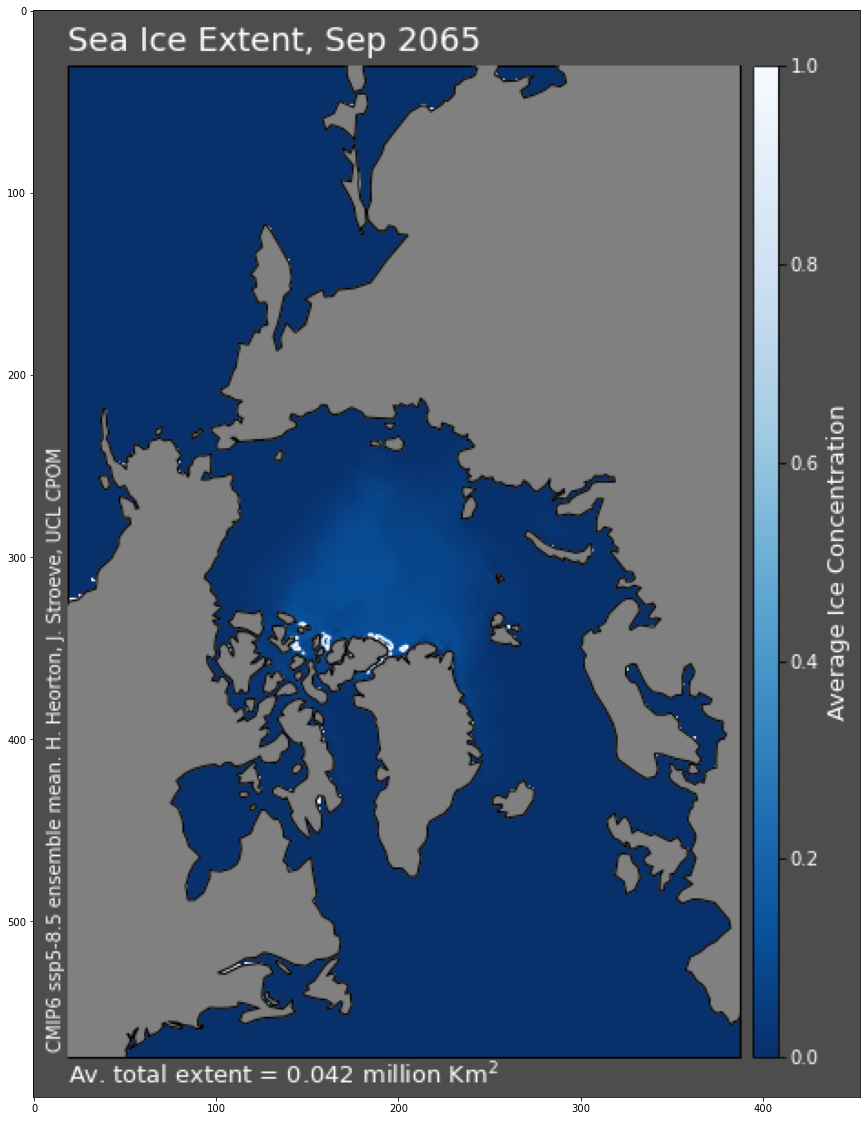

In [24]:
f = plt.figure(figsize=[20,20])
plt.imshow(make_frame(50))

In [25]:
# gfile = 'Ensemble_no_models_sept_extent.gif'
# gfile = 'Ensemble_ave_area_sept_extent.gif'
gfile = 'Ensemble_ens_av_area_sept_extent_contour_ssp585.gif'
images = []
# for nt in range(n_t):
#### load the data from
for y in range(85):
    print(y)
    image = make_frame(y)
    images.append(image)
        
imageio.mimsave(gfile, images, fps=2)

0


/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84


In [344]:
data_IC['Model_list'][0]
# [d.split('--')[0] for d in data_IC['Model_list']]

'AS-RCEC--TaiESM1_ensembles_used'

In [28]:
for d in data_IC['Model_list']:
    cnt = 0
    new_str = []
    for ch in data_IC[d]:
        if ch is not ' ':
            new_str.append(ch)
        elif np.mod(cnt+1,4) != 0:
            new_str.append(ch)
            cnt += 1
        else:
            new_str.append('\n')
            cnt += 1
    data_IC[d+'_tidy'] =  ''.join(new_str)

In [29]:
### makes a table, copy paste it into a tex file
from tabulate import tabulate

# rows = [[Cmp['centre'],Cmp['name'],Cmp['ensemble']] for Cmp in Clist]
rows = [[d.split('--')[0],d.split('--')[1].split('_ensembles')[0], data_IC[d+'_tidy']] for d in data_IC['Model_list']]

print(tabulate(rows,
           headers=['Centre','Model','Ensemble']
               , tablefmt='fancy_grid'))

╒═════════════════════╤══════════════════╤═══════════════════════════════════════════╕
│ Centre              │ Model            │ Ensemble                                  │
╞═════════════════════╪══════════════════╪═══════════════════════════════════════════╡
│ BCC                 │ BCC-CSM2-MR      │ r1i1p1f1                                  │
├─────────────────────┼──────────────────┼───────────────────────────────────────────┤
│ CAMS                │ CAMS-CSM1-0      │ r1i1p1f1, r2i1p1f1                        │
├─────────────────────┼──────────────────┼───────────────────────────────────────────┤
│ CAS                 │ FGOALS-f3-L      │ r1i1p1f1                                  │
├─────────────────────┼──────────────────┼───────────────────────────────────────────┤
│ CAS                 │ FGOALS-g3        │ r1i1p1f1, r2i1p1f1, r3i1p1f1              │
├─────────────────────┼──────────────────┼───────────────────────────────────────────┤
│ CCCma               │ CanESM5-CanOE    │ 